In [7]:
import sys

In [6]:
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [160]:
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
import random

In [23]:
def sumBetween(start, finish, data):
    sum = 0
    if start == finish:
        return data[start]
    
    for i in range(start, finish):
        sum += data[i]
    return sum


def sumWindow(start,size,data):
  return sumBetween(start, start+size, data)
  



In [124]:


def findWindow(value, data):
    n = len(data)+1
    leftBound = None
    rightBound = None
    for window in range(1, n):
        leftBound = data[0] if leftBound is None else leftBound + window
        rightBound = data[-1] if rightBound is None else rightBound + \
            (n-window)
        if leftBound <= value <= rightBound:
            if (value-leftBound) % window == 0:
                return window, int((value-leftBound)/window)
    return None

window, start = findWindow(12, sequence)
print(start+1, start+1+window, sumBetween(start, start+window, sequence))


3 6 12


In [26]:
def slidingWindowNaiveIterations(n):
  count = 0
  for i in range(n):
    for j in range(n-i):
      count += 1
  return count


slidingWindowNaiveIterations(11)

66

In [250]:
def bouncingWindow(target, sequence, verbose=False):
    class States(Enum):
        LOOK_FORWARD = 0
        MOVE_FORWARD = 1
        LOOK_BACK = 2

    n = len(sequence)
    windowLeft = 0
    windowRight = 0
    state = States.LOOK_FORWARD
    memory = (0, 0)
    iterCount = 0
    if verbose:
        naiveIter = slidingWindowNaiveIterations(n)
    while windowLeft != n and windowRight != n:
        iterCount += 1
        sum = np.sum(sequence[windowLeft: windowRight+1])
        if verbose:
            print("Iteration {0}/{1} Target:{6}\nSum: {2}, Window: [{3},{4}], State: {5}\n".format(
                iterCount, naiveIter, sum, windowLeft, windowRight, state, target))
            
        if target == sum:
            return windowLeft, windowRight, iterCount

        match state:
            case States.LOOK_FORWARD:
                if sum < target:
                    windowRight += 1
                elif sum > target:
                    state = States.MOVE_FORWARD
                    windowLeft += 1

            case States.MOVE_FORWARD:
                if sum > target:
                    windowLeft += 1
                elif sum < target:
                    windowRight += 1
                    memory = (windowLeft, windowRight)
                    state = States.LOOK_BACK

            case States.LOOK_BACK:
                if sum < target:
                    windowLeft -= 1
                elif sum > target:
                    windowLeft, windowRight = memory
                    state = States.LOOK_FORWARD
    return None,None,iterCount

def generateTestSequence(length):
    return np.random.randint(1,length+1, length)

testSequence = [1, 8, 7, 2, 5, 4, 3, 9, 6, 5, 2]
bouncingWindow(random.randint(1,20), generateTestSequence(10), True)


Iteration 1/55 Target:2
Sum: 4, Window: [0,0], State: States.LOOK_FORWARD

Iteration 2/55 Target:2
Sum: 0, Window: [1,0], State: States.MOVE_FORWARD

Iteration 3/55 Target:2
Sum: 9, Window: [1,1], State: States.LOOK_BACK

Iteration 4/55 Target:2
Sum: 9, Window: [1,1], State: States.LOOK_FORWARD

Iteration 5/55 Target:2
Sum: 0, Window: [2,1], State: States.MOVE_FORWARD

Iteration 6/55 Target:2
Sum: 10, Window: [2,2], State: States.LOOK_BACK

Iteration 7/55 Target:2
Sum: 10, Window: [2,2], State: States.LOOK_FORWARD

Iteration 8/55 Target:2
Sum: 0, Window: [3,2], State: States.MOVE_FORWARD

Iteration 9/55 Target:2
Sum: 6, Window: [3,3], State: States.LOOK_BACK

Iteration 10/55 Target:2
Sum: 6, Window: [3,3], State: States.LOOK_FORWARD

Iteration 11/55 Target:2
Sum: 0, Window: [4,3], State: States.MOVE_FORWARD

Iteration 12/55 Target:2
Sum: 5, Window: [4,4], State: States.LOOK_BACK

Iteration 13/55 Target:2
Sum: 5, Window: [4,4], State: States.LOOK_FORWARD

Iteration 14/55 Target:2
Sum: 0

(None, None, 29)

In [256]:

scores = []
for i in range(1,100):
    xScores = []
    for _ in range(200):
        testSequence = generateTestSequence(i)
        target = random.randint(1,i+1)
        _,_,score = bouncingWindow(target, testSequence)
        xScores.append(score)
    scores.append(xScores)
    
scores = np.asarray(scores)



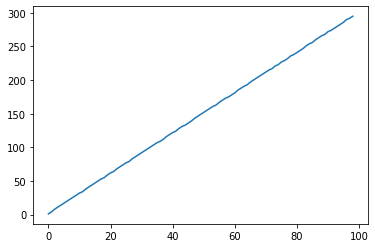

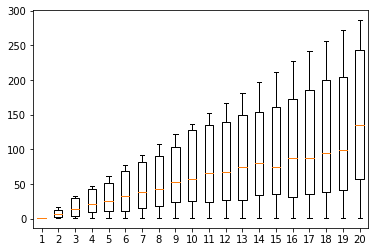

In [269]:
plt.plot(scores.max(1))
plt.show()
plt.boxplot(scores.transpose()[:,::5])
plt.show()